# Dinner and Python!

This notebook is made by __Nicholas Russell Saerang__ for PGP's PCT dinner session on 20 October 2021.

## Setup

To use the packages and tools provided by Python for Telegram bots, we have to install them and then import it.

In [ ]:
!pip install python-telegram-bot
from telegram.ext import Updater, CommandHandler

# We also want to try sending Wikipedia summaries with the bot
!pip install wikipedia
import wikipedia

# Install finance data reader
!pip install finance-datareader

# Install matplotlib to visualize data
import matplotlib.pyplot as plt

In [58]:
wikipedia.summary("Wikipedia")

'Wikimedia Foundation, Inc. (WMF, or simply Wikimedia) is an American foundation headquartered in San Francisco, California. WMF owns and operates the Wikimedia projects.It was established in 2003 by Jimmy Wales as a way to fund Wikipedia and its sibling projects through non-profit means. As of 2021, it employs over 550 staff and contractors, with annual revenues in excess of US$150 million. \nMaría Sefidari was chairman of the board until she stepped down and became a paid consultant to the foundation in June 2021; vice chairman Nataliia Tymkiv is the acting chair. Katherine Maher was the executive director from June 2016 to April 2021.'

## Getting Started: BotFather

Head to BotFather on Telegram and then type `/newbot`.<br>
BotFather will reply this.

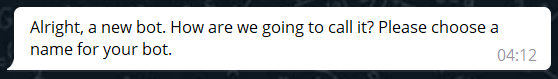

This is what you want the bot's display name to be. Next, BotFather will ask you to do this.

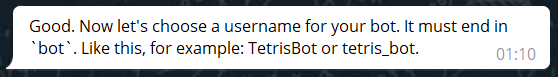

Once you've inputted the bot's Telegram handle, this message will appear, confirming the bot's creation.

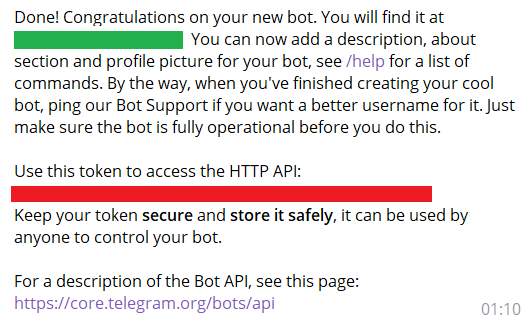

Now copy the API key given in the red box and put it below!

In [59]:
TOKEN = "" # fill the token here!

## Coding the Bot

To code, we must define a main function that serves as the center of everything, starting from the bot object, list of commands, and so on.

In this session, a few lines has been defined for you (so you can have more time for dinner). We shall only focus on the handler part.

In [60]:
def main():
  updater = Updater(token=TOKEN, use_context=True)
  dp = updater.dispatcher

  # List of commands that we can do!
  dp.add_handler(CommandHandler("start", start))    # run the start function if the message is /start
  dp.add_handler(CommandHandler("add", add))        # run the add function if the message is /add
  dp.add_handler(CommandHandler("subtract", sub))   # run the sub function if the message is /subtract
  dp.add_handler(CommandHandler("multiply", mul))   # run the mul function if the message is /multiply
  dp.add_handler(CommandHandler("divide", div))     # run the div function if the message is /divide
  dp.add_handler(CommandHandler("wiki", wiki))
  dp.add_handler(CommandHandler("stocks", stocks))
  dp.add_handler(CommandHandler("test", test))

  updater.start_polling()
  print("++++++++++ STARTING BOT +++++++++++")
  updater.idle()
  print("++++++++++  KILLING BOT  ++++++++++")

Each bot command takes a spot on the bot's handler. Each handler is related to one keyword and one function to execute actions triggered by this keyword.

Before we move on to Level 0, let's go to BotFather and customize your bot a bit. Type `/mybots` and click on the bot you just made. Proceed to `Edit Bot`. This message will show up in no time.

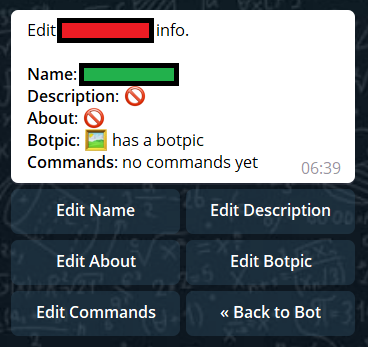

Feel free to edit the bot's name, description, about page, botpic. But now, we're going to edit the bot commands to enable shortcut, so that it's easier to find the bot command that we want before even finish typing it!

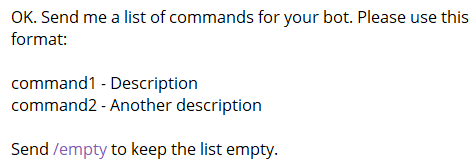

For today's session, let's use this list!
```
start - Greeting message
add - Adds two integers
subtract - Subtracts two integers
multiply - Mutiplies two integers
divide - Divides two integers
wiki - Gives a Wikipedia page summary
stocks - Retrieves the latest stock update
```

### Level 0: Start

In this level we just want to familiarize with the structure of a bot command. Since `/start` triggers this function to run, what should we put in the function is the question.

In [61]:
def start(update, context):
  # Retrieve message ID of the chat
  msg_id = update.message.message_id

  # Refer to https://core.telegram.org/api/entities
  update.message.reply_text('Hi! How are you?')
  update.message.reply_text('<b>Hi! How are you?</b>', parse_mode='HTML')
  update.message.reply_text('`Hi! How are you?`', parse_mode='markdown')

  # We can also make the bot reply to a certain message, in this case our query message
  update.message.reply_text('Hi, this is a reply!', reply_to_message_id = msg_id)
  update.message.reply_text('`Hi! How are you?`', parse_mode='markdown', reply_to_message_id = msg_id)

### Level 1: Math and Wikipedia

Now let's do some math for fun! Plus Wikipedia because why not :)

In [62]:
# Just a test function, not important
def test(update, context):
  update.message.reply_text(update.message.chat.username) # Gets your username without the @
  update.message.reply_text(str(context.args))            # Lists whatever you type after the command, space-separated
                                                          # Example: if you type /test hello haha, context.args will become ['hello', 'haha'], a list

def add(update, context):
  msg_id = update.message.message_id
  numbers = context.args # something like ['2', '3']
  update.message.reply_text(int(numbers[0]) + int(numbers[1]), reply_to_message_id = msg_id)

def sub(update, context):
  msg_id = update.message.message_id
  numbers = context.args # something like ['2', '3']
  update.message.reply_text(int(numbers[0]) - int(numbers[1]), reply_to_message_id = msg_id)

def mul(update, context):
  msg_id = update.message.message_id
  numbers = context.args # something like ['2', '3']
  update.message.reply_text(int(numbers[0]) * int(numbers[1]), reply_to_message_id = msg_id)

def div(update, context):
  msg_id = update.message.message_id
  numbers = context.args # something like ['2', '3']
  if int(numbers[1]) == 0:
    update.message.reply_text("Error division by zero!", reply_to_message_id = msg_id)
  else:
    update.message.reply_text(int(numbers[0]) / int(numbers[1]), reply_to_message_id = msg_id)

def wiki(update, context):
  msg_id = update.message.message_id
  query = " ".join(context.args)
  # Our query may give Wikipedia some disambiguation error. This try-except block handles the case when this error happens.
  try:
    update.message.reply_text(wikipedia.summary(query), reply_to_message_id = msg_id)
  except:
    update.message.reply_text("I can't seem to find it. Try something more specific.", reply_to_message_id = msg_id)

**Here is some result!**

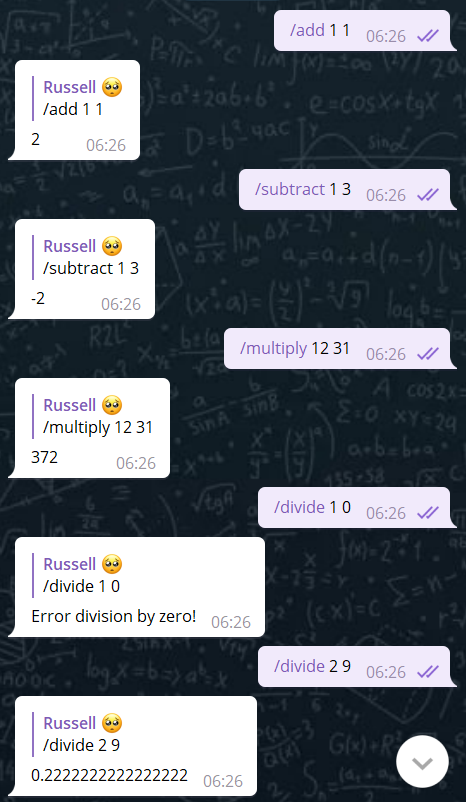

### Level 2: Stocks

The moment everyone's been waiting for.<br>
First, import a few packages I found online that are useful for today's session.

In [63]:
import FinanceDataReader as fdr
import datetime

With `datetime`, we can create a date and time object such as below.

In [64]:
start_2020 = datetime.datetime(2020, 1, 1) # 1 January 2020
one_week_ago = datetime.datetime.now() - datetime.timedelta(weeks=1)
one_month_ago = datetime.datetime.now() - datetime.timedelta(weeks=4) # months=1 is not an option, so weeks=4 is the closest
now = datetime.datetime.now()

We now use `fdr.DataReader` to read data about a stock update from a certain time until now. In the below example, I'm taking Apple's stock data from one week ago until now.

In [65]:
aapl = fdr.DataReader('AAPL', one_week_ago)
aapl

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2021-10-11,142.81,142.27,144.81,141.81,64260000.0,-0.0006
2021-10-12,141.51,143.23,143.25,141.04,73040000.0,-0.0091
2021-10-13,140.91,141.24,141.40,139.20,77570000.0,-0.0042
2021-10-14,143.76,142.11,143.88,141.51,67210000.0,0.0202
2021-10-15,144.84,143.77,144.90,143.51,67680000.0,0.0075


Here, `aapl` is a table-like data structure called **Data Frame**. You might have heard this from the **Pandas** library. No worries if you are not familiar with it yet.

To access the list of row names, we use the `index` method/function. Using this row name we can also access a certain value inside the table using `loc`.

In [66]:
aapl.index

DatetimeIndex(['2021-10-11', '2021-10-12', '2021-10-13', '2021-10-14',
               '2021-10-15'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [67]:
aapl.index[0]

Timestamp('2021-10-11 00:00:00')

In [68]:
aapl.loc[aapl.index[0], "Close"]

142.81

Now that we know how to extract the parts of the data, we shall implement our `stocks` function!

In [69]:
def stocks(update, context):
  stock = context.args[0]
  msg_id = update.message.message_id

  # See more here https://github.com/FinanceData/FinanceDataReader
  # Don't worry about not understanding the language, code is universal!
  data = fdr.DataReader(stock, one_week_ago)

  # We put our multiline text inside a list where each element represents a single row
  text = [f'*📈📈 {stock} STOCKS UPDATE 📈📈*', '']
  
  # Takes the latest row
  date = data.index[-1] 
  
  # This converts the date time object into strings by a certain format
  # %d means day, %B means full name of the month, %Y means year in 4 digit-format
  # You can see more at https://www.programiz.com/python-programming/datetime/strftime
  text.append(date.strftime("*%d %B %Y*")) # Something like '16 October 2021'

  # Add close and open price
  text.append("Close: " + str(data.loc[date, 'Close']) + ", Open: " + str(data.loc[date, 'Open']))

  # Add high and low price
  text.append("High: " + str(data.loc[date, 'High']) + ", Low: " + str(data.loc[date, 'Low']))

  # Send the message!
  update.message.reply_text('\n'.join(text), parse_mode='markdown', reply_to_message_id = msg_id)

**Here's an example of how you obtain the stocks update!**

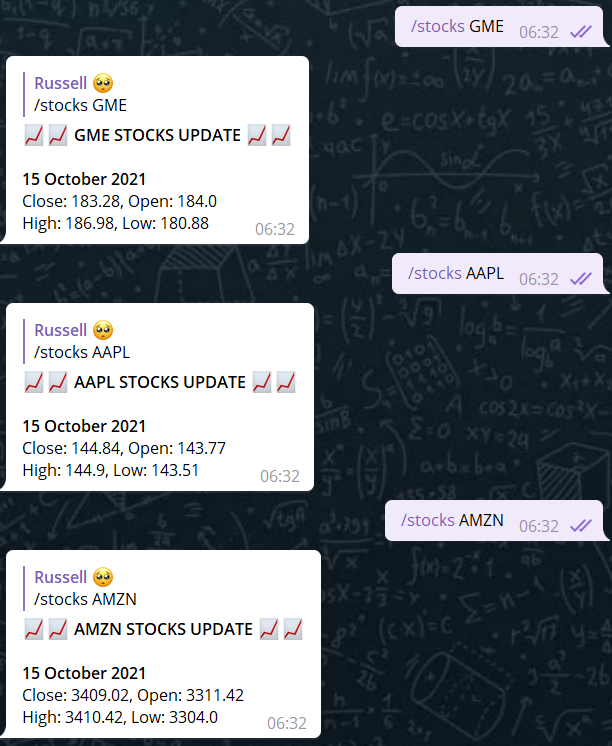

#### Bonus: Candlestick Graph

In [ ]:
# Plot a candlestick graph
import plotly.graph_objects as go

aapl = fdr.DataReader('AAPL', one_week_ago)
usdsgd = fdr.DataReader('USD/SGD', one_week_ago)
data = aapl*usdsgd

fig = go.Figure(data=[go.Candlestick(
                x=data.index,
                open=data['Open'],
                high=data['High'],
                low=data['Low'],
                close=data['Close'])])

fig.show()

#### Bonus 2: Sending Plots

Text(0.5, 1.0, 'AAPL Stocks')

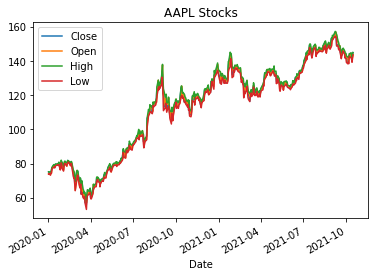

In [71]:
data = fdr.DataReader('AAPL', start_2020)
data.drop(columns=["Volume", "Change"]).plot()
plt.title("AAPL Stocks")

In [72]:
def stocks(update, context):
  stock = context.args[0]
  msg_id = update.message.message_id

  data = fdr.DataReader(stock, one_week_ago)
  text = [f'*📈📈 {stock} STOCKS UPDATE 📈📈*', '']
  date = data.index[-1]
  text.append(date.strftime("*%d %B %Y*"))
  text.append("Close: " + str(data.loc[date, 'Close']) + ", Open: " + str(data.loc[date, 'Open']))
  text.append("High: " + str(data.loc[date, 'High']) + ", Low: " + str(data.loc[date, 'Low']))
  update.message.reply_text('\n'.join(text), parse_mode='markdown', reply_to_message_id = msg_id)

  # Extra addition here to send plot as well! Might be useful for CS1010S, DAO1704, and DAO2702
  data = fdr.DataReader(stock, one_month_ago)
  data.drop(columns=["Volume", "Change"]).plot()
  plt.title(f"{stock} Stocks Chart (Last Month)")
  plt.savefig(f"{stock}.png")
  
  # Instead of replying text, we can also reply photo using the png files we have saved before!
  update.message.reply_photo(open(f"{stock}.png", 'rb'), reply_to_message_id = msg_id)

**Now we can obtain monthly stocks update in a single plot from a Telegram bot! Pretty cool right?**

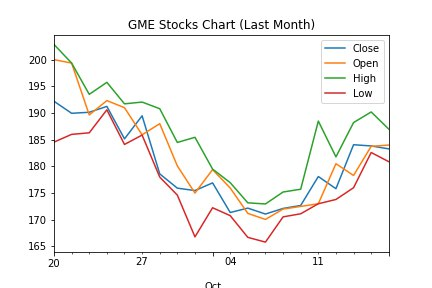

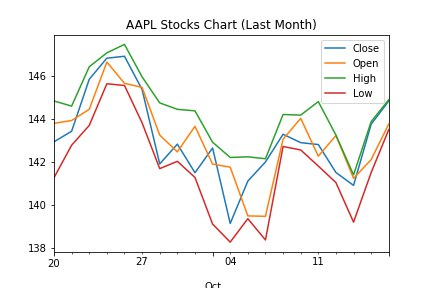

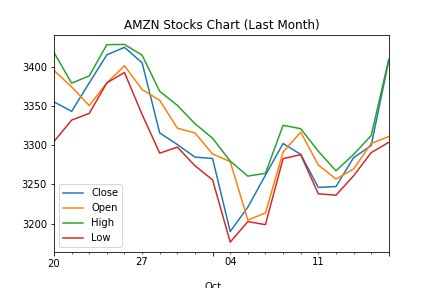

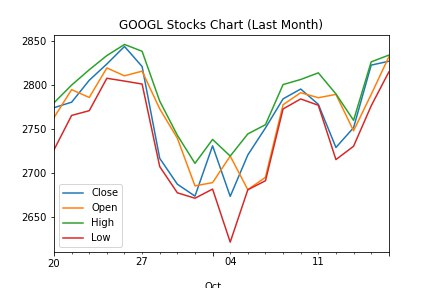

## Start the Bot!

In [ ]:
main()

And that's it we're done with the basics of coding a Telegram bot with Python!